In [ ]:
!pip install wordnet

  Preparing metadata (setup.py) ... done
  Created wheel for wordnet: filename=wordnet-0.0.1b2-py3-none-any.whl size=10501 sha256=2f10cb73498b64ff4117decd0f61233b0cc95af943a28e558c32f4a2d2f79e70
  Stored in directory: /root/.cache/pip/wheels/c0/a1/e8/4649c8712033dcdbd1e64a0fc75216a5d1769665852c36b4f9
Successfully built wordnet


In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
import spacy
import string
pd.options.mode.chained_assignment = None


In [ ]:
df = pd.read_csv("harry_potter_books.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95085 entries, 0 to 95084
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     95085 non-null  object
 1   book     95085 non-null  object
 2   chapter  95085 non-null  object
dtypes: object(3)
memory usage: 2.2+ MB


In [ ]:
df.head()

,text,book,chapter
0,"THE BOY WHO LIVED Mr. and Mrs. Dursley, of nu...",Book 1: Philosopher's Stone,chap-1
1,"four, Privet Drive, were proud to say that the...",Book 1: Philosopher's Stone,chap-1
2,thank you very much. They were the last people...,Book 1: Philosopher's Stone,chap-1
3,"be involved in anything strange or mysterious,...",Book 1: Philosopher's Stone,chap-1
4,with such nonsense. Mr. Dursley was the direc...,Book 1: Philosopher's Stone,chap-1


In [ ]:
df["text"] = df["text"].astype(str)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95085 entries, 0 to 95084
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     95085 non-null  object
 1   book     95085 non-null  object
 2   chapter  95085 non-null  object
dtypes: object(3)
memory usage: 2.2+ MB


In [ ]:
# punctuation removal

PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    # custom function to remove the punctuation
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df["preprocessed_text"] = df["text"].apply(lambda text: remove_punctuation(text))
df.head()

,text,book,chapter,preprocessed_text
0,"THE BOY WHO LIVED Mr. and Mrs. Dursley, of nu...",Book 1: Philosopher's Stone,chap-1,THE BOY WHO LIVED Mr and Mrs Dursley of number
1,"four, Privet Drive, were proud to say that the...",Book 1: Philosopher's Stone,chap-1,four Privet Drive were proud to say that they ...
2,thank you very much. They were the last people...,Book 1: Philosopher's Stone,chap-1,thank you very much They were the last people ...
3,"be involved in anything strange or mysterious,...",Book 1: Philosopher's Stone,chap-1,be involved in anything strange or mysterious ...
4,with such nonsense. Mr. Dursley was the direc...,Book 1: Philosopher's Stone,chap-1,with such nonsense Mr Dursley was the directo...


In [ ]:
# Stopwords removal

import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df["preprocessed_text"] = df["preprocessed_text"].apply(lambda text: remove_stopwords(text))
df.head()

,text,book,chapter,preprocessed_text
0,"THE BOY WHO LIVED Mr. and Mrs. Dursley, of nu...",Book 1: Philosopher's Stone,chap-1,THE BOY WHO LIVED Mr Mrs Dursley number
1,"four, Privet Drive, were proud to say that the...",Book 1: Philosopher's Stone,chap-1,four Privet Drive proud say perfectly normal
2,thank you very much. They were the last people...,Book 1: Philosopher's Stone,chap-1,thank much They last people youd expect
3,"be involved in anything strange or mysterious,...",Book 1: Philosopher's Stone,chap-1,involved anything strange mysterious didnt hold
4,with such nonsense. Mr. Dursley was the direc...,Book 1: Philosopher's Stone,chap-1,nonsense Mr Dursley director firm


In [ ]:
# Lemmatization
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet # import the wordnet module


lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

df["prerocessed_text"] = df["preprocessed_text"].apply(lambda text: lemmatize_words(text))
df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,text,book,chapter,preprocessed_text,prerocessed_text
0,"THE BOY WHO LIVED Mr. and Mrs. Dursley, of nu...",Book 1: Philosopher's Stone,chap-1,THE BOY WHO LIVED Mr Mrs Dursley number,THE BOY WHO LIVED Mr Mrs Dursley number
1,"four, Privet Drive, were proud to say that the...",Book 1: Philosopher's Stone,chap-1,four Privet Drive proud say perfectly normal,four Privet Drive proud say perfectly normal
2,thank you very much. They were the last people...,Book 1: Philosopher's Stone,chap-1,thank much They last people youd expect,thank much They last people youd expect
3,"be involved in anything strange or mysterious,...",Book 1: Philosopher's Stone,chap-1,involved anything strange mysterious didnt hold,involve anything strange mysterious didnt hold
4,with such nonsense. Mr. Dursley was the direc...,Book 1: Philosopher's Stone,chap-1,nonsense Mr Dursley director firm,nonsense Mr Dursley director firm


In [ ]:
df["preprocessed_text"].to_csv('harry_potter_text.txt', sep='\t', index=False)

In [ ]:
import os
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_gradient_magnitude

from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS

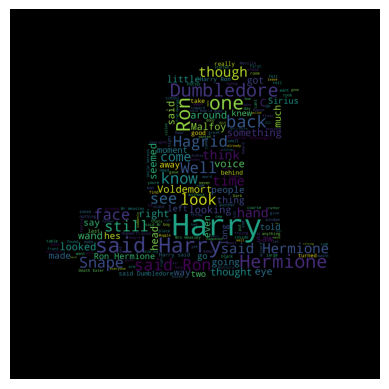

In [ ]:
text = open("harry_potter_text.txt", 'r').read()

mask = np.array(Image.open('Witch-Hat-PNG-Image-File.png'))

wc = WordCloud(stopwords = STOPWORDS,
               mask = mask,
               background_color = 'black',
               contour_color = 'black',
               contour_width = 1
               ).generate(text)
plt.imshow(wc)
plt.axis('off')
plt.show()



In [ ]:
wc.to_file("harry_potter_wc.png")

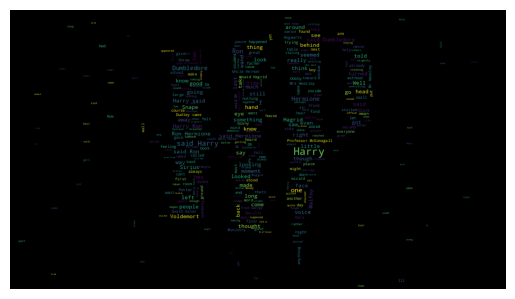

In [ ]:
text = open("harry_potter_text.txt", 'r').read()

mask = np.array(Image.open('/content/Harry-Potter-symbol.png').convert('RGB'))

wc = WordCloud(stopwords = STOPWORDS,
               mask = mask,
               background_color = 'black',
               max_words = 2000,
               ).generate(text)
plt.imshow(wc)
plt.axis('off')
plt.show()


In [ ]:
np.array(Image.open('/content/Harry-Potter-symbol.png'))

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

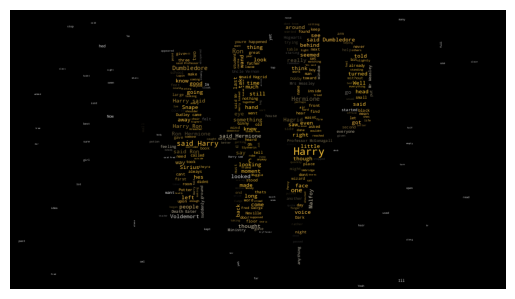

In [ ]:
colormap = ImageColorGenerator(mask)
wc.recolor(color_func = colormap)
plt.imshow(wc)
plt.axis('off')
plt.show()